# Observations

The analysis supports that there is a correlation between temperatures and latitude. Locations closer to the equator are warmer, and cooler the further away you are.
There are not strong relationships between humidity, wind speed or cloudiness and latitude.

In [1]:
# Dependencies
import json
import requests
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
from scipy.stats import linregress


# Import the API key
from config import weather_key

# Abililty to utilize citipy to determine nearest cities using geo coordinates (longitude and Latitude)
from citipy import citipy

# Define the range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate the list of Cities

In [2]:
# Create lists to hold the geo coordinates and the cities
lat_lngs = []
cities = []


# Create random latitude and longitude sets
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.00, high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)

# What are the nearest cities for each latitude and longitude set
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
# add the city to the cities list if it is unique
    if city not in cities:
        cities.append(city)
                
# Do I have enough cities?
print(len(cities))

586


# Perform API calls to OpenWeatherMap and create a DataFrame

In [3]:
# Define the url the make the API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#Variables to keep track of response number
record = 0
sets = 1

In [4]:
# Create a DataFrame that will hold the results of the API calls to OpenWeatherMap
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


#Execute API calls to OpenWeatherMap for each city in the dataset
print('Beginning Data Retrieval')
print("--------------------")

for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        #print (query_url) 
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
         
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
--------------------
Processing Record 0  of Set 1 | athabasca.
Processing Record 1  of Set 1 | nikolskoye.
Processing Record 2  of Set 1 | hermanus.
Processing Record 3  of Set 1 | saint george.
Processing Record 4  of Set 1 | olafsvik.
Processing Record 5  of Set 1 | nizhneyansk.
City not found...skipping nizhneyansk.
Processing Record 6  of Set 1 | butaritari.
Processing Record 7  of Set 1 | new norfolk.
Processing Record 8  of Set 1 | rikitea.
Processing Record 9  of Set 1 | mauguio.
Processing Record 10  of Set 1 | bluff.
Processing Record 11  of Set 1 | mopipi.
Processing Record 12  of Set 1 | carnarvon.
Processing Record 13  of Set 1 | barentsburg.
City not found...skipping barentsburg.
Processing Record 14  of Set 1 | sumbawanga.
Processing Record 15  of Set 1 | ushuaia.
Processing Record 16  of Set 1 | port alfred.
Processing Record 17  of Set 1 | satitoa.
City not found...skipping satitoa.
Processing Record 18  of Set 1 | manono.
Processing Record 19 

Processing Record 32  of Set 4 | ilulissat.
Processing Record 33  of Set 4 | amderma.
City not found...skipping amderma.
Processing Record 34  of Set 4 | cabedelo.
Processing Record 35  of Set 4 | carmelo.
Processing Record 36  of Set 4 | narsaq.
Processing Record 37  of Set 4 | la cruz.
Processing Record 38  of Set 4 | dwarka.
Processing Record 39  of Set 4 | codrington.
Processing Record 40  of Set 4 | eureka.
Processing Record 41  of Set 4 | elizabeth city.
Processing Record 42  of Set 4 | goderich.
Processing Record 43  of Set 4 | chudovo.
Processing Record 44  of Set 4 | cockburn town.
Processing Record 45  of Set 4 | saint-denis.
Processing Record 46  of Set 4 | hithadhoo.
Processing Record 47  of Set 4 | providencia.
Processing Record 48  of Set 4 | margate.
Processing Record 49  of Set 4 | hualmay.
Processing Record 0  of Set 5 | yurimaguas.
Processing Record 1  of Set 5 | vila velha.
Processing Record 2  of Set 5 | bonavista.
Processing Record 3  of Set 5 | birao.
Processing R

Processing Record 12  of Set 8 | vao.
Processing Record 13  of Set 8 | marsh harbour.
Processing Record 14  of Set 8 | cabo san lucas.
Processing Record 15  of Set 8 | talnakh.
Processing Record 16  of Set 8 | kotovo.
Processing Record 17  of Set 8 | salinas.
Processing Record 18  of Set 8 | mount isa.
Processing Record 19  of Set 8 | darhan.
Processing Record 20  of Set 8 | hamilton.
Processing Record 21  of Set 8 | tuy hoa.
Processing Record 22  of Set 8 | kalabo.
Processing Record 23  of Set 8 | nacala.
Processing Record 24  of Set 8 | yerbogachen.
Processing Record 25  of Set 8 | kostarazion.
City not found...skipping kostarazion.
Processing Record 26  of Set 8 | houston.
Processing Record 27  of Set 8 | bandarbeyla.
Processing Record 28  of Set 8 | marawi.
Processing Record 29  of Set 8 | nioro.
Processing Record 30  of Set 8 | charters towers.
Processing Record 31  of Set 8 | guerrero negro.
Processing Record 32  of Set 8 | arlit.
Processing Record 33  of Set 8 | kimbe.
Processin

Processing Record 42  of Set 11 | ritchie.
Processing Record 43  of Set 11 | muisne.
Processing Record 44  of Set 11 | ahtopol.
Processing Record 45  of Set 11 | karratha.
Processing Record 46  of Set 11 | zhangzhou.
Processing Record 47  of Set 11 | yumaguzino.
Processing Record 48  of Set 11 | acapulco.
Processing Record 49  of Set 11 | iquitos.
Processing Record 0  of Set 12 | cap malheureux.
Processing Record 1  of Set 12 | college place.
Processing Record 2  of Set 12 | marsa matruh.
Processing Record 3  of Set 12 | iranshahr.
Processing Record 4  of Set 12 | barcelos.
Processing Record 5  of Set 12 | nsoko.
Processing Record 6  of Set 12 | parabita.
Processing Record 7  of Set 12 | rocha.
Processing Record 8  of Set 12 | port blair.
Processing Record 9  of Set 12 | alofi.
Processing Record 10  of Set 12 | cluses.
Processing Record 11  of Set 12 | lumberton.
Processing Record 12  of Set 12 | egvekinot.
Processing Record 13  of Set 12 | karacakoy.
Processing Record 14  of Set 12 | 

In [5]:
# How many cities were returned?
weather_df.count()

City                586
Country             586
Date                586
Latitude            586
Longitude           586
Cloudiness (%)      586
Humidity (%)        586
Max Temp (F)        586
Wind Speed (mph)    586
dtype: int64

In [6]:
# Display the Weather DataFrame
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,athabasca,CA,2021-01-24 12:37:16,54.7169,-113.285,100,76,-12.73,4.12
1,nikolskoye,RU,2021-01-24 12:37:16,59.7035,30.7861,90,87,35.87,4
2,hermanus,ZA,2021-01-24 12:37:16,-34.4187,19.2345,13,61,69.278,3.58
3,saint george,US,2021-01-24 12:37:16,37.1041,-113.584,1,81,43.268,0.66
4,olafsvik,IS,2021-01-24 12:37:16,64.8945,-23.7142,85,91,28.868,13.13


In [7]:
#Export the weather dataframe to an output file
weather_df.to_csv("output/weather_df.csv")

#  Plotting the Data

# Latitude vs. Temperature Plot 

Temperatures are lower the further away from the equator you are.


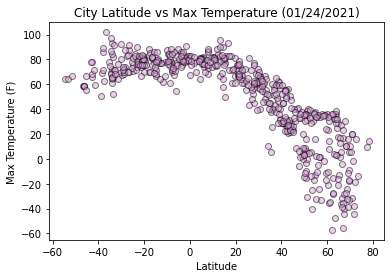

In [8]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="plum", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.savefig("output/LatTmp.png")
print("Temperatures are lower the further away from the equator you are.")
plt.show()

#   Latitude vs. Humidity Plot

There is wide distribution of humidity and latitude, and no clear relatioship is seen.


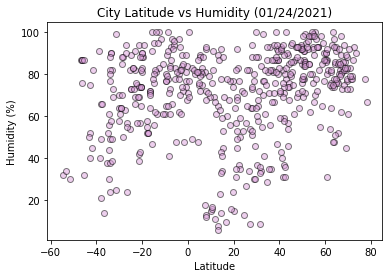

In [9]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="plum", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({today})")
plt.savefig("output/LatHum.png")
print("There is wide distribution of humidity and latitude, and no clear relatioship is seen.")
plt.show()

# Latitude vs. Cloudiness Plot

There is wide distribution of cloudiness and latitude, and no clear relatioship is seen


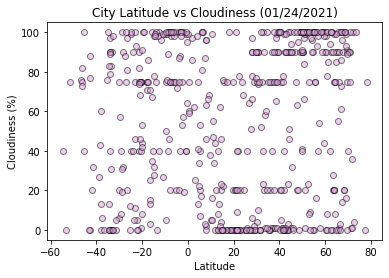

In [10]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="plum", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.savefig("output/LatCloud.png")
print("There is wide distribution of cloudiness and latitude, and no clear relatioship is seen")
plt.show()

# Latitude vs. Wind Speed Plot

There is wide distribution of wind speed and latitude, and no clear relatioship is seen


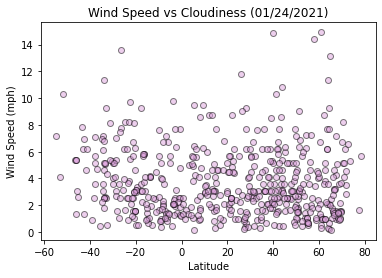

In [11]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="plum", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Wind Speed vs Cloudiness ({today})")
plt.savefig("output/LatWind.png")
print("There is wide distribution of wind speed and latitude, and no clear relatioship is seen")
plt.show()

# Linear Regression

In [12]:
# Create data frames for the Northern and Southern hemispheres
northern_hemis = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_hemis = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R-Value is -0.85 and the regression shows a negative correlation.
This shows that in the nothern hemisphere, there is decrease in temperature the further away from the equator that you are.


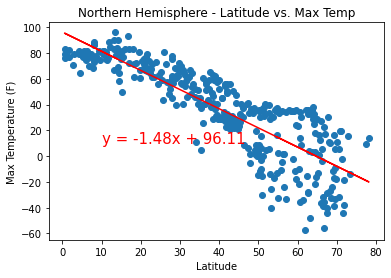

In [13]:
# Setting up the linear regression equation and line to add to the plot
x_values = pd.to_numeric(northern_hemis['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hemis['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Latitude vs. Max Temp')
print(f"The R-Value is {round(rvalue,2)} and the regression shows a negative correlation.")
print("This shows that in the nothern hemisphere, there is decrease in temperature the further away from the equator that you are.")
plt.savefig("output/NorthLatTemp.png")
plt.show()

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.23x + 80.96
The R-Value is 0.34 and the regression shows a positive correlation.
This shows that in the southern hemisphere, there is an increase in temperature the closer to the equator that you are.


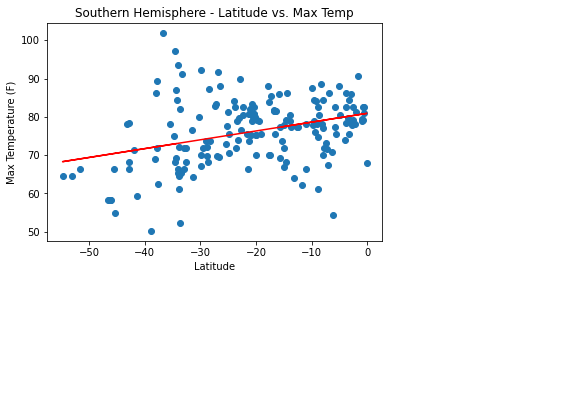

In [14]:
# Setting up the linear regression equation and line to add to the plot
x_values = pd.to_numeric(southern_hemis['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hemis['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Latitude vs. Max Temp')
print(f"The R-Value is {round(rvalue,2)} and the regression shows a positive correlation.")
print("This shows that in the southern hemisphere, there is an increase in temperature the closer to the equator that you are.")
plt.savefig("output/SouthLatTemp.png")
plt.show()

# Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression

The R-Value is 0.37 and the regression is somewhat positive.
This shows that in the nothern hemisphere, there is some but little correlation between distance to the equator and humidity.


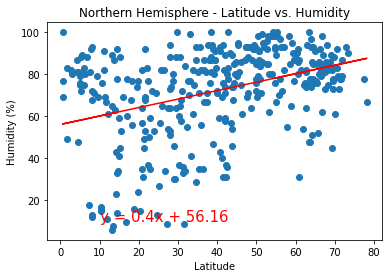

In [15]:
# Setting up the linear regression equation and line to add to the plot
x_values = pd.to_numeric(northern_hemis['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hemis['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Latitude vs. Humidity')
print(f"The R-Value is {round(rvalue,2)} and the regression is somewhat positive.")
print("This shows that in the nothern hemisphere, there is some but little correlation between distance to the equator and humidity.")
plt.savefig("output/NorthLatHum.png")
plt.show()

# Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression

Regression line equation is: y = 0.57x + 82.49
The R-Value is 0.39 and the regression is somewhat positive.
This shows that in the southern hemisphere, there is some but limited correlation between distance to the equator and humidity.


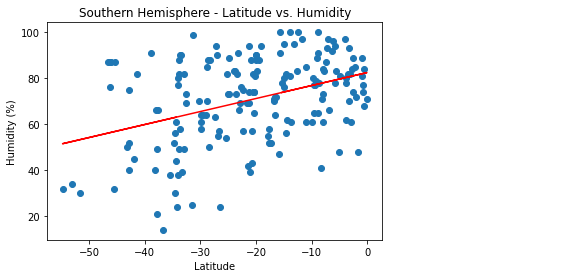

In [16]:
# Setting up the linear regression equation and line to add to the plot
x_values = pd.to_numeric(southern_hemis['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hemis['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Latitude vs. Humidity')
print(f"The R-Value is {round(rvalue,2)} and the regression is somewhat positive.")
print("This shows that in the southern hemisphere, there is some but limited correlation between distance to the equator and humidity.")
plt.savefig("output/SouthLatHum.png")
plt.show()

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R-Value is 0.27 and the regression is somewhat positive.
This shows that in the nothern hemisphere, there is some but little correlation between distance to the equator and cloudiness.


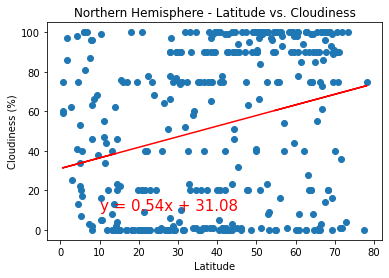

In [17]:
# Setting up the linear regression equation and line to add to the plot
x_values = pd.to_numeric(northern_hemis['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hemis['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Latitude vs. Cloudiness')
print(f"The R-Value is {round(rvalue,2)} and the regression is somewhat positive.")
print("This shows that in the nothern hemisphere, there is some but little correlation between distance to the equator and cloudiness.")
plt.savefig("output/NorthLatCloud.png")
plt.show()

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.86x + 77.59
The R-Value is 0.32 and the regression is positive.
This shows that in the southern hemisphere, there is a correlation between distance to the equator and cloudiness.


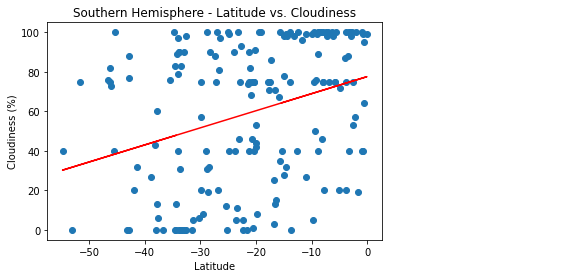

In [18]:
# Setting up the linear regression equation and line to add to the plot
x_values = pd.to_numeric(southern_hemis['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hemis['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Latitude vs. Cloudiness')
print(f"The R-Value is {round(rvalue,2)} and the regression is positive.")
print("This shows that in the southern hemisphere, there is a correlation between distance to the equator and cloudiness.")
plt.savefig("output/SouthLatCloud.png")
plt.show()

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R-Value is -0.01 and the regression flat.
This shows that in the nothern hemisphere, there is almost no correlation between distance to the equator and wind speed.


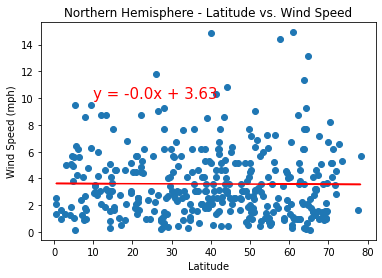

In [19]:
# Setting up the linear regression equation and line to add to the plot
x_values = pd.to_numeric(northern_hemis['Latitude']).astype(float)
y_values = pd.to_numeric(northern_hemis['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Latitude vs. Wind Speed')
print(f"The R-Value is {round(rvalue,2)} and the regression flat.")
print("This shows that in the nothern hemisphere, there is almost no correlation between distance to the equator and wind speed.")
plt.savefig("output/NorthLatWind.png")
plt.show()

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.06x + 2.66
The R-Value is -0.29 and the regression is somewhat negative.
This shows that in the nothern hemisphere, there is some but limited correlation between distance to the equator and wind speed.


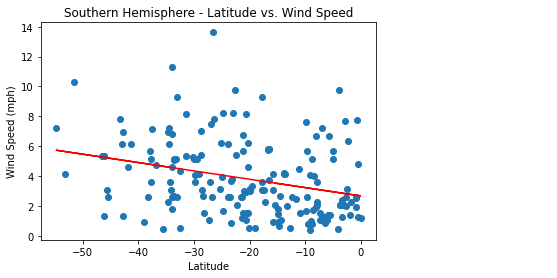

In [20]:
# Setting up the linear regression equation and line to add to the plot
x_values = pd.to_numeric(southern_hemis['Latitude']).astype(float)
y_values = pd.to_numeric(southern_hemis['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Latitude vs. Wind Speed')
print(f"The R-Value is {round(rvalue,2)} and the regression is somewhat negative.")
print("This shows that in the nothern hemisphere, there is some but limited correlation between distance to the equator and wind speed.")
plt.savefig("output/SouthLatWind.png")
plt.show()